# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
# !pip3 install matplotlib pandas scipy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicates["Mouse ID"].unique()[0]
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == duplicate_mouse_id]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"] != duplicate_mouse_id]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_grouped = cleaned_data.groupby('Drug Regimen')  
  
mean_tumor = drug_grouped['Tumor Volume (mm3)'].mean()  
median_tumor = drug_grouped['Tumor Volume (mm3)'].median()  
variance_tumor = drug_grouped['Tumor Volume (mm3)'].var()  
std_tumor = drug_grouped['Tumor Volume (mm3)'].std()  
sem_tumor = drug_grouped['Tumor Volume (mm3)'].sem()  
  
summary_table = pd.DataFrame({  
    'Mean Tumor Volume': mean_tumor,  
    'Median Tumor Volume': median_tumor,  
    'Tumor Volume Variance': variance_tumor,  
    'Tumor Volume Std. Dev.': std_tumor,  
    'Tumor Volume Std. Err.': sem_tumor  
}) 
summary_table 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = drug_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])  
# summary_table_agg = summary_table_agg.rename(columns={  
#     'mean': 'Mean Tumor Volume',  
#     'median': 'Median Tumor Volume',  
#     'var': 'Tumor Volume Variance',  
#     'std': 'Tumor Volume Std. Dev.',  
#     'sem': 'Tumor Volume Std. Err.'  
# })  
summary_table_agg  


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

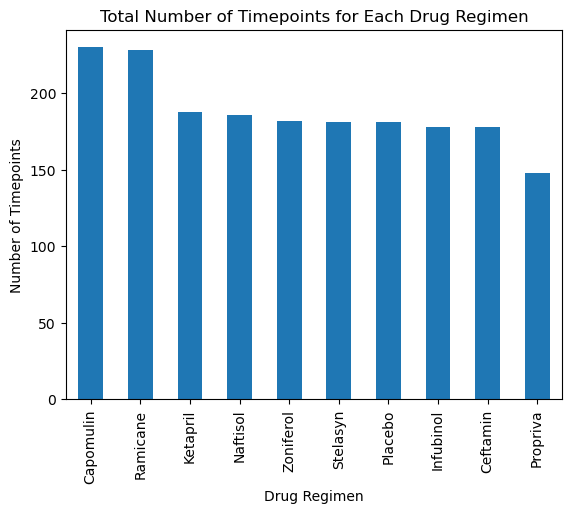

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = cleaned_data["Drug Regimen"].value_counts()
timepoint_counts.plot(kind='bar', title='Total Number of Timepoints for Each Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

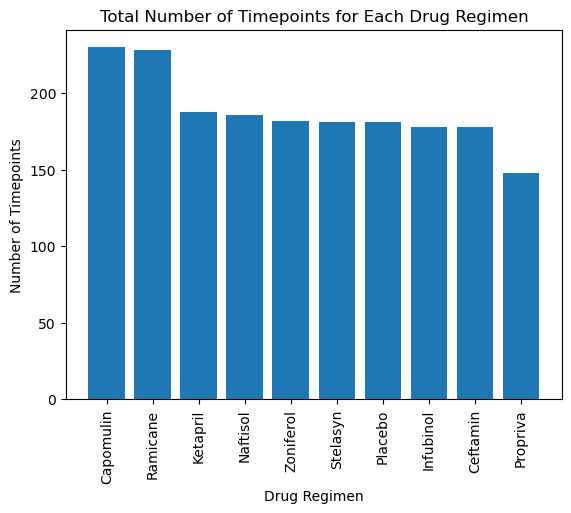

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

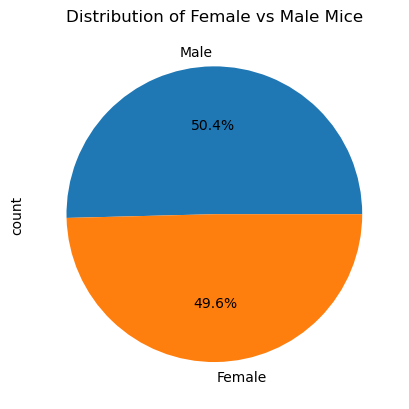

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_counts = cleaned_data.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice')
plt.show()

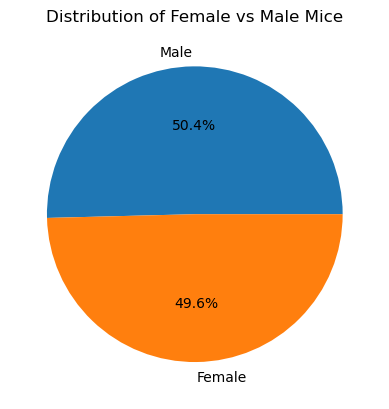

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left') 


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []  

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:  
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']  
    tumor_vol_list.append(tumor_vol)  
    # Calculate quartiles  
    quartiles = tumor_vol.quantile([.25, .5, .75])  
    lowerq = quartiles[0.25]  
    upperq = quartiles[0.75]  
    iqr = upperq - lowerq  
    # print(f'The lower quartile of tumor volumes is: {lowerq}')  
    # print(f'The upper quartile of tumor volumes is: {upperq}')  
    # print(f'The interquartile range of tumor volumes is: {iqr}')  
    # print(f'The median of tumor volumes is: {quartiles[0.5]}')  
    # Determine outliers  
    lower_bound = lowerq - (1.5 * iqr)  
    upper_bound = upperq + (1.5 * iqr)  
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]  
    print(f'{drug}\'s potential outliers: {outliers}')  
    # print(f'Outliers: {outliers}\n')  

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


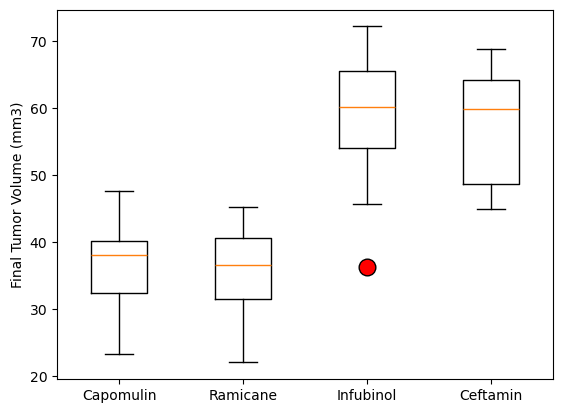

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()  
  
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')  
ax.boxplot(tumor_vol_list, labels=treatments, flierprops=flierprops)  
  
# ax.set_xlabel('Drug Regimen')  
ax.set_ylabel('Final Tumor Volume (mm3)')  
# ax.set_title('Tumor Volume Distribution by Drug Regimen')  
plt.show()  

## Line and Scatter Plots

First mouse treated with Capomulin: b128


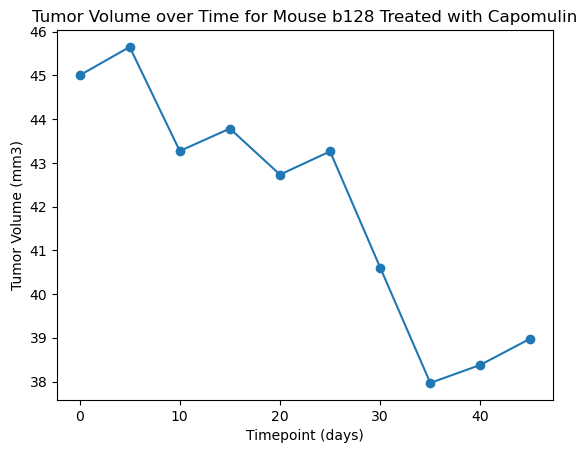

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']  
mouse_id = capomulin_data['Mouse ID'].unique()[0]  
print(f'First mouse treated with Capomulin: {mouse_id}')  
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]  
  
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')  
  
plt.xlabel('Timepoint (days)')  
plt.ylabel('Tumor Volume (mm3)')  
plt.title(f'Tumor Volume over Time for Mouse {mouse_id} Treated with Capomulin')  
plt.show()  

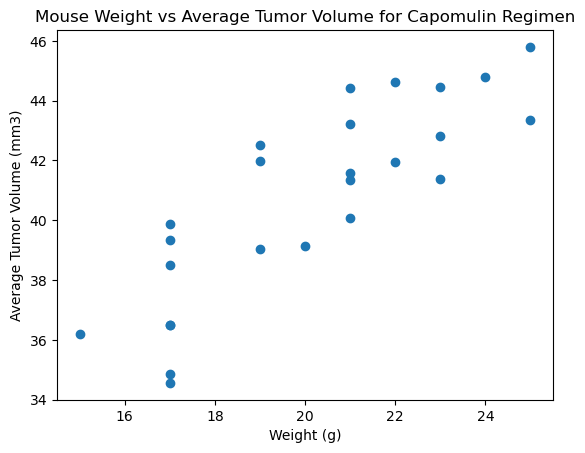

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()  
  
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])  
plt.xlabel('Weight (g)')  
plt.ylabel('Average Tumor Volume (mm3)')  
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')  
plt.show()  

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


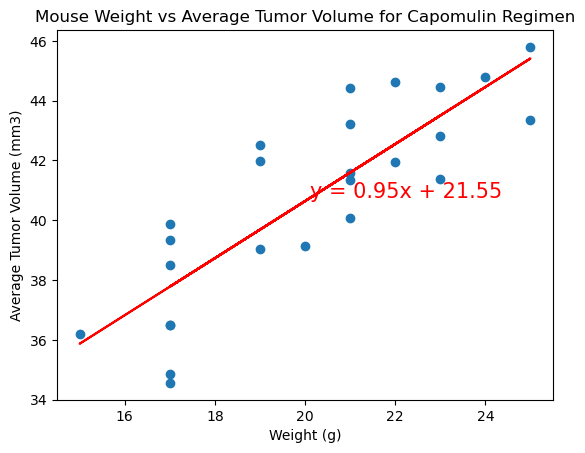

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_grouped['Weight (g)']  
avg_tumor_vol = capomulin_grouped['Tumor Volume (mm3)']  
  
correlation = st.pearsonr(weight, avg_tumor_vol)  
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")  
  
# Linear regression  
  
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)  
  
regress_values = weight * slope + intercept  
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'  
  
# Plotting the regression line on scatter plot  
  
plt.scatter(weight, avg_tumor_vol)  
plt.plot(weight, regress_values, 'r-')  
plt.xlabel('Weight (g)')  
plt.ylabel('Average Tumor Volume (mm3)')  
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')  
plt.annotate(line_eq, (weight.mean(), avg_tumor_vol.mean()), fontsize=15, color='red')  
plt.show()  